# Regression Trees and Model Optimization - Lab

## Introduction

In this lab, we'll see how to apply regression analysis using CART trees while making use of some hyperparameter tuning to improve our model. 

## Objectives

In this lab you will: 

- Perform the full process of cleaning data, tuning hyperparameters, creating visualizations, and evaluating decision tree models 
- Determine the optimal hyperparameters for a decision tree model and evaluate the performance of decision tree models

## Boston Housing dataset - again! 

The dataset is available in the file `'boston.csv'`. 

- Import the dataset and print its `.head()` and dimensions: 

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load the Boston housing dataset 
data = pd.read_csv('boston.csv', index_col=0)

# Print the first five rows 
print(data.head())

# Print the dimensions of data
print(data.shape)

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2  
(506, 14)


## Identify features and target data 

In this lab, we will use three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`: 

#### Features
- `'RM'` is the average number of rooms among homes in the neighborhood 
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor) 
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood 

#### Target
- `MEDV`',the median value of the home 

- Create DataFrames for the features and the target variable as shown above 
- Inspect the contents for validity 

In [6]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [12]:
# Features and target data
target = data['medv']
to_drop = ['crim', 'zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'tax', 'black', 'medv']
features = data.drop(to_drop, axis=1)
evaluate = features.join(target)
evaluate.sample(10)

,rm,ptratio,lstat,medv
420,6.824,20.2,22.74,8.4
350,6.939,19.7,5.89,26.6
496,5.670,19.2,17.60,23.1
279,6.482,17.6,7.19,29.1
212,5.404,18.6,23.98,19.3
462,6.376,20.2,14.65,17.7
63,6.456,19.7,6.73,22.2
344,6.696,17.6,7.18,23.9
281,7.820,14.9,3.76,45.4
169,6.319,14.7,11.10,23.8


## Inspect correlations 

- Use scatter plots to show the correlation between the chosen features and the target variable
- Comment on each scatter plot 

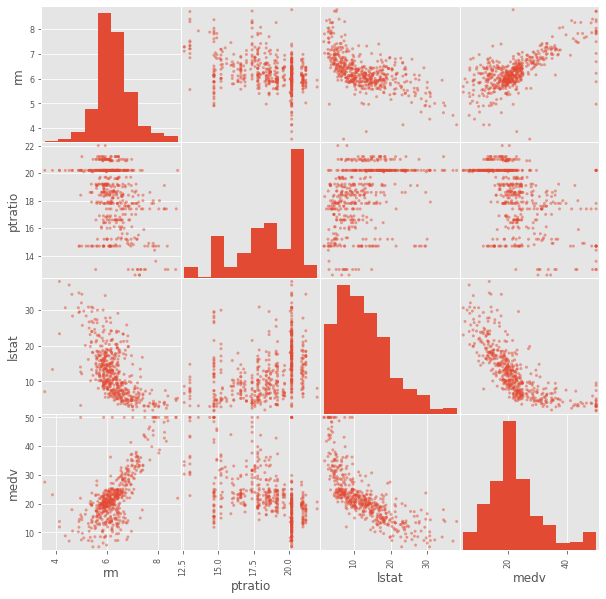

In [16]:
# Your code here 
pd.plotting.scatter_matrix(evaluate, figsize=(10,10));

Only, the bottom row of plots will be commented on. In the 'rm' plot, there looks to be a generally positive trend, and could be a good candidate for regression. In the 'ptratio' plot, there is a general negative trend, but is a less good candidate for regression. In the 'lstat' plot, there is a generally negative trend, and it looks like 'lstat' is a great candidate for regression analysis.

## Create evaluation metrics

- Import `r2_score` and `mean_squared_error` from `sklearn.metrics` 
- Create a function `performance(true, predicted)` to calculate and return the r-squared score and MSE for two equal-sized arrays for the given true and predicted values 

In [17]:
# Import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Define the function
def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    from sklearn.metrics import mean_squared_error as mse
    from sklearn.metrics import r2_score
    # Calculate the r2 score between 'y_true' and 'y_predict'
    r_squared = r2_score(y_true, y_predict)
    
    # Calculate the mean squared error between 'y_true' and 'y_predict'
    mean_square_error = mse(y_true, y_predict)
    
    # Return the score
    return r_squared, mean_square_error


# Test the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.4719999999999998]

(0.9228556485355649, 0.4719999999999998)

## Split the data into training and test sets

- Split `features` and `target` datasets into training/test data (80/20) 
- For reproducibility, use `random_state=42`

In [22]:
from sklearn.model_selection import train_test_split 
X = features
y = target
# Split the data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Grow a vanilla regression tree

- Import the `DecisionTreeRegressor` class
- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above 
- Use `random_state=45` for tree instance
- Record your observations

In [23]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)
score

# [0.47097115950374013, 38.795686274509805]  - R2, MSE

(0.46034649239225756, 37.790393700787405)

## Hyperparameter tuning (I)

- Find the best tree depth using depth range: 1-30
- Run the regressor repeatedly in a `for` loop for each depth value  
- Use `random_state=45` for reproducibility
- Calculate MSE and r-squared for each run 
- Plot both performance measures for all runs 
- Comment on the output 

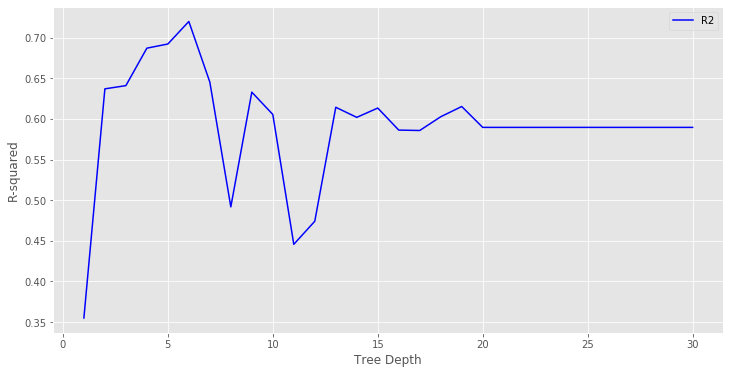

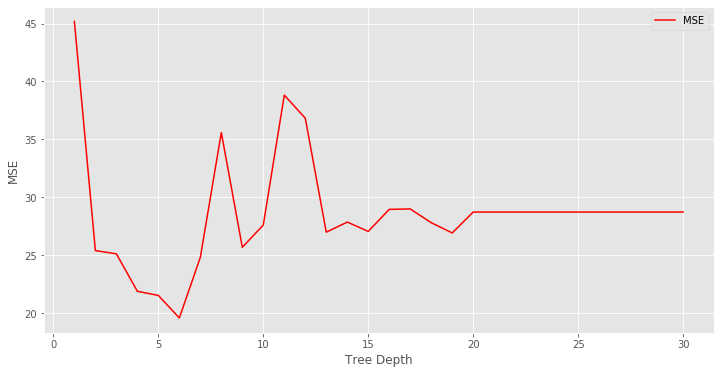

7.0


In [40]:
# Your code here 
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()
print(max_depths[6])

## Hyperparameter tuning (II)

- Repeat the above process for `min_samples_split` 
- Use a range of values from 2-10 for this hyperparameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above 

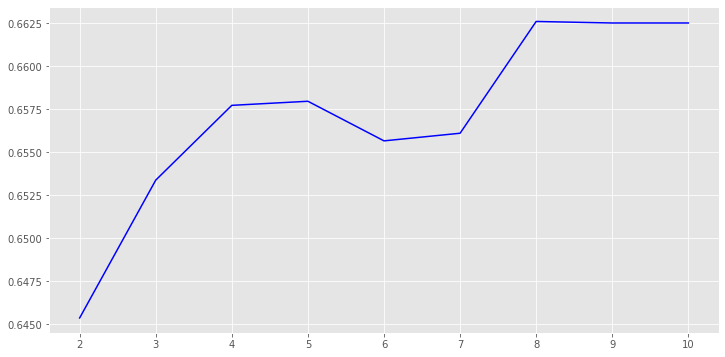

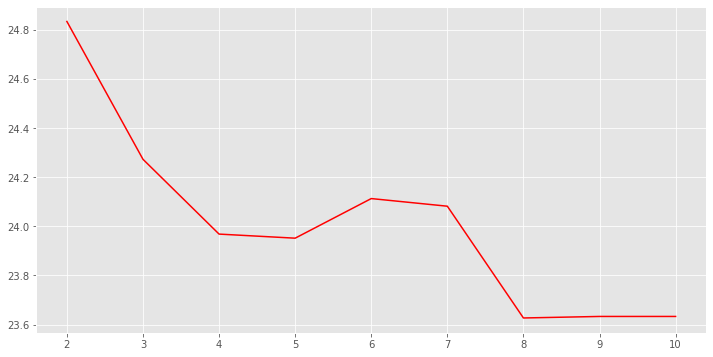

10


In [39]:
# Identify the optimal minimum split size for given data
min_samples_splits = np.arange(2, 11)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(max_depth=7, min_samples_split=int(min_samples_split), random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, mse_results, 'r', label='MSE')
plt.show()
print(min_samples_splits[8])

# Run the *optimized* model 

- Use the best values for `max_depth` and `min_samples_split` found in previous runs and run an optimized model with these values 
- Calculate the performance and comment on the output 

In [42]:
# Your code here 
regressor = DecisionTreeRegressor(max_depth=7, min_samples_split=10, random_state=45)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
performance(y_test, y_pred)

(0.6625129911753811, 23.633251248417313)

## Level up (Optional)

- How about bringing in some more features from the original dataset which may be good predictors?
- Also, try tuning more hyperparameters like max-features to find a more optimal version of the model 

## Summary 

In this lab, we looked at applying a decision-tree-based regression analysis on the Boston Housing dataset. We saw how to train various models to find the optimal values for hyperparameters. 